# Beginner's Python—Session One Mathematics/Statisics Answers

## Normalising and Standardising data

Normalising a list $x = [x_1,\dots,x_n]$ transforms each element $x_i$, which becomes $\frac{x_i - min(x)}{max(x)-min(x)}$

The following cell block shows the process of normalising the list $[1,2,3,4,5]$

In [1]:
# Defining the list
x = [1,2,3,4,5]

# Creating variables for the minimum and maximum values of element of the list
minx = min(x)
maxx = max(x)

# Creating a function - normalise - to get the normalised form of one element of the list
normalise = lambda x: (x-minx)/(maxx-minx)

# map is just applying the function to all elements of the list
# We then represent this as a list
list(map(normalise,x))

[0.0, 0.25, 0.5, 0.75, 1.0]

Standardising a list $x = [x_1,\dots,x_n]$ transforms each element $x_i$, which becomes $\frac{x_i - \bar{x}}{\sigma}$,

where $\bar{x} = \frac{1}{n}\sum_{i=1}^nx_i$ is the sample mean, and

$\sigma^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})^2$ is the variance

Try to use a method like above in order to standardise the list $[1,2,3,4,5]$

Hint: You might need to use the map function in order to calculate the variance

In [2]:
# Creating veriables
n = len(x)
xbar = (sum(x))/n

# Calculating the variance
shift = lambda x: x-xbar
shifted = map(shift,x)

square = lambda x: x**2
sumready = map(square, shifted)

var = (sum(sumready))/n

# Creating the standardise function
standardise = lambda x: (x-xbar)/(var**0.5)

# Output 
list(map(standardise,x))

[-1.414213562373095,
 -0.7071067811865475,
 0.0,
 0.7071067811865475,
 1.414213562373095]

## Transforming data into a specified range

Given the same list $[1,2,3,4,5]$, can you transform it so that all elements lie between two bounds, both specified by a user input?

Hint:

Can you do this by first normalising the data?

In [3]:
x = [1,2,3,4,5]

# Normalising the list
minx = min(x)
maxx = max(x)
normalise = lambda x: (x-minx)/(maxx-minx)
normalised = list(map(normalise,x))

# Get upper and lower bounds
lower_bound = float(input('Enter a lower bound for the interval'))
upper_bound = float(input('Enter an upper bound for the interval'))

# Create a function to put a value of the list in the new range
move = lambda x: lower_bound + x*(upper_bound - lower_bound)

# Applying this function to the normalised list
print('The new list is: ' + str(list(map(move,normalised))))

Enter a lower bound for the interval15
Enter an upper bound for the interval105
The new list is: [15.0, 37.5, 60.0, 82.5, 105.0]


## Linear Regression

Given a set of n 2D points $(x_1,y_1), (x_2,y_2), \dots, (x_n,y_n)$, find the line $\hat{y}(x) = b_0 + b_1x$ that minimises the squared distance between the predicted and actual values, $\hat{y}(x_i)$ and $y(x_i)$ repsectively. 

The squared distance is given by $\sum_{i=1}^{n} (\hat{y}(x_i) - y(x_i))^2$

Using basic calculus and algebra we get the following equations for $b_0$ and $b_1$:

\begin{align*}
b_0 = \frac{(\sum_{i=1}^{n}y_i)(\sum_{i=1}^{n}x_i^2) - (\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}x_iy_i)}{n\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2}
\end{align*}

\begin{align*}
b_1 = \frac{n\sum_{i=1}^{n}x_iy_i - (\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}y_i)}{n\sum_{i=1}^{n}x_i^2 - (\sum_{i=1}^{n}x_i)^2}
\end{align*}

The following function takes in two lists an inputs, and outputs their dot product (if they are thought of as vectors)

In [4]:
def dot(x,y):
    return sum(i[0] * i[1] for i in zip(x, y))

Let's apply linear regression to the points with $x$ and $y$ coordinates defined below:

In [5]:
X = [1,2,3,4,5,6,7,8]
Y = [2,3,7,5,5,6,4,5]

See if you can calculate $b_0$ and $b_1$, you can use the dot function defined above.

In [6]:
n = len(X)
    
sumx = sum(X)
sumy = sum(Y)

sumx2 = dot(X,X)
sumxy = dot(X, Y)
    
b0 = (sumx2*sumy - sumx*sumxy) / (n*sumx2 - sumx**2)
b1 = (n*sumxy - sumx*sumy) / (n*sumx2 - sumx**2)

Now we're going to plot the results!

In [7]:
# Package used for plotting
import matplotlib.pyplot as plt

The following cell uses our values of $b_0$ and $b_1$ to plot the line, along with out input coordinates. 

Run the cell to see the plot

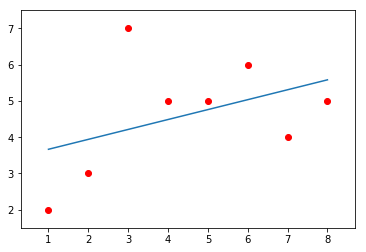

In [8]:
# Package used for evaluating our line at different x values
import numpy as np

# Plotting our inputted points
plt.plot([X],[Y], 'ro')
    
maxx = max(X)
minx = min(X)
maxy = max(Y)
miny = min(Y)
    
# Plotting the line of best fit
x = np.arange(minx, maxx, (maxx-minx)/10000)
plt.plot(x, np.polyval([b1,b0],x))
    
plt.axis([minx-0.1*(maxx-minx), maxx+0.1*(maxx-minx), 
          miny - 0.1*(maxy-miny), maxy + 0.1*(maxy-miny)])
plt.show()